# Developing an ensemble system to predict liver disease in adults

<b>Hi!</b>
The README file contains more information on the project, its process and data.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importing necessary libraries

data4 = pd.read_csv('Liver_Disease_Raw_Dataset.csv') #identifying our datasets
data4.head() #sample/first 5 rows of our datatset

,Patient ID,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
0,1,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,Yes
1,2,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,Yes
2,3,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,Yes
3,4,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,Yes
4,5,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,Yes


In [58]:
data4.describe()

,Patient ID,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,1750.000000,1749.000000,1748.000000,1750.000000,1748.000000,1748.000000,1746.000000,1748.000000,1747.000000,1738.000000
mean,875.500000,45.213836,3.535240,1.656743,290.551487,80.719108,109.681558,6.482723,3.143045,0.946922
std,505.325802,18.568600,8.146868,5.347349,242.878316,182.570191,288.796591,1.085017,0.794765,0.319371
min,1.000000,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,438.250000,33.000000,0.800000,0.200000,175.000000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,875.500000,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,1312.750000,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000
max,1750.000000,260.000000,121.700000,112.800000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [59]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Patient ID                  1750 non-null   int64  
 1   Age                         1749 non-null   float64
 2   Gender                      1749 non-null   object 
 3   Total_Bilirubin             1748 non-null   float64
 4   Direct_Bilirubin            1750 non-null   float64
 5   Alkaline_Phosphotase        1748 non-null   float64
 6   Alamine_Aminotransferase    1748 non-null   float64
 7   Aspartate_Aminotransferase  1746 non-null   float64
 8   Total_Protiens              1748 non-null   float64
 9   Albumin                     1747 non-null   float64
 10  Albumin_and_Globulin_Ratio  1738 non-null   float64
 11  Disease                     1750 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 164.2+ KB


## Exploratory Data Analysis and Pre-processing

In [60]:
data4.isnull().sum() #to check for missing values

Patient ID                     0
Age                            1
Gender                         1
Total_Bilirubin                2
Direct_Bilirubin               0
Alkaline_Phosphotase           2
Alamine_Aminotransferase       2
Aspartate_Aminotransferase     4
Total_Protiens                 2
Albumin                        3
Albumin_and_Globulin_Ratio    12
Disease                        0
dtype: int64

**There are several missing values in the dataset.**

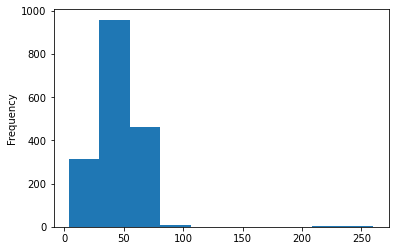

In [61]:
data4.Age.plot(kind = 'hist')
plt.show()

**Some of the data points observed are outliers because the age is over 200. Ages in the outlier range will be removed to make the max age 100.**

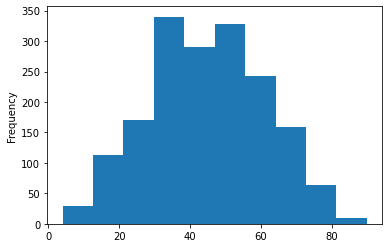

In [62]:
data4 = data4[data4.Age <= 100] #to only show ages up to 100

data4.Age.plot(kind = 'hist')
plt.show()

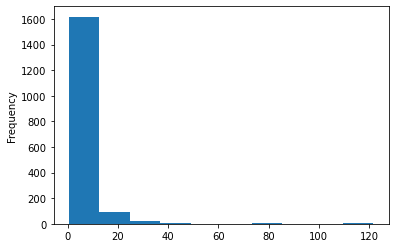

In [63]:
data4.Total_Bilirubin.plot(kind = 'hist')
plt.show()

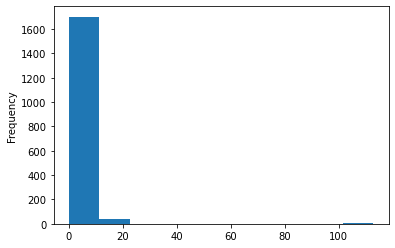

In [64]:
data4.Direct_Bilirubin.plot(kind = 'hist')
plt.show()

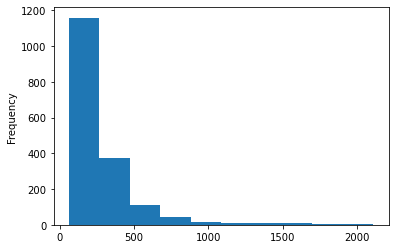

In [65]:
data4.Alkaline_Phosphotase.plot(kind = 'hist')
plt.show()

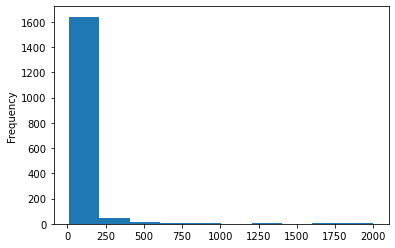

In [66]:
data4.Alamine_Aminotransferase.plot(kind = 'hist')
plt.show()

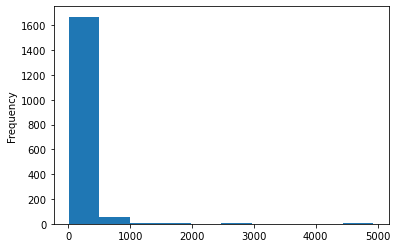

In [67]:
data4.Aspartate_Aminotransferase.plot(kind = 'hist')
plt.show()

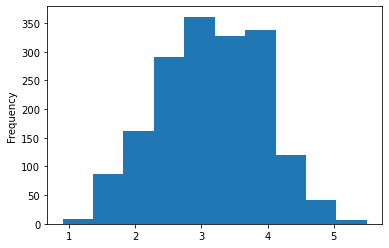

In [68]:
data4.Albumin.plot(kind = 'hist')
plt.show()

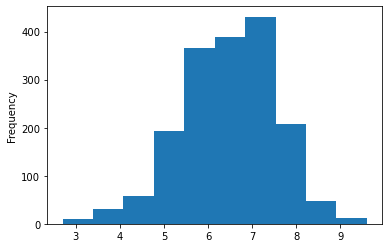

In [69]:
data4.Total_Protiens.plot(kind = 'hist')
plt.show()

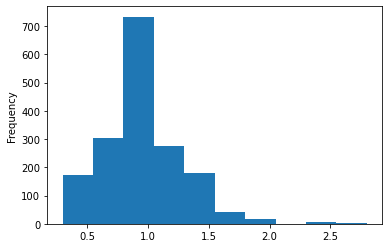

In [70]:
data4.Albumin_and_Globulin_Ratio.plot(kind = 'hist')
plt.show()

**The 'Gender' data cannot be plotted as it has no numeric data.**

## Approah 1 - Data Science 

Focusing on pre-processing the dataset before training the models.

In [71]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1745 entries, 0 to 1749
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Patient ID                  1745 non-null   int64  
 1   Age                         1745 non-null   float64
 2   Gender                      1744 non-null   object 
 3   Total_Bilirubin             1743 non-null   float64
 4   Direct_Bilirubin            1745 non-null   float64
 5   Alkaline_Phosphotase        1743 non-null   float64
 6   Alamine_Aminotransferase    1743 non-null   float64
 7   Aspartate_Aminotransferase  1741 non-null   float64
 8   Total_Protiens              1743 non-null   float64
 9   Albumin                     1742 non-null   float64
 10  Albumin_and_Globulin_Ratio  1733 non-null   float64
 11  Disease                     1745 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 177.2+ KB


In [72]:
data4.isnull().sum() #to check for missing values

Patient ID                     0
Age                            0
Gender                         1
Total_Bilirubin                2
Direct_Bilirubin               0
Alkaline_Phosphotase           2
Alamine_Aminotransferase       2
Aspartate_Aminotransferase     4
Total_Protiens                 2
Albumin                        3
Albumin_and_Globulin_Ratio    12
Disease                        0
dtype: int64

### Imputation 
After visualizing data and checking for null values, the missing values in each column will be replaced with the mean value of each column. As there is no mean value for gender, the most occurring gender (mode) will be used to replace the null gender values.

In [73]:
#to replace missing values in the column where there are null values
data4['Total_Bilirubin'] = data4['Total_Bilirubin'].fillna(data4.Total_Bilirubin.mean())
data4['Alkaline_Phosphotase'] = data4['Alkaline_Phosphotase'].fillna(data4.Alkaline_Phosphotase.mean())
data4['Alamine_Aminotransferase'] = data4['Alamine_Aminotransferase'].fillna(data4.Alamine_Aminotransferase.mean())
data4['Aspartate_Aminotransferase'] = data4['Aspartate_Aminotransferase'].fillna(data4.Aspartate_Aminotransferase.mean())
data4['Total_Protiens'] = data4['Total_Protiens'].fillna(data4.Total_Protiens.mean())
data4['Albumin'] = data4['Albumin'].fillna(data4.Albumin.mean())
data4['Albumin_and_Globulin_Ratio'] = data4['Albumin_and_Globulin_Ratio'].fillna(data4.Albumin.mean())
data4['Gender'] = data4['Gender'].fillna(data4.Gender.mode()[0])

In [74]:
data4.isnull().sum() #to check for missing values

Patient ID                    0
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Disease                       0
dtype: int64

**There are no longer any missing or null values in the dataset.**

### Labelling Data (Encoding)

In [75]:
# label encoding gender and disease columns
data4['Gender'] = data4['Gender'].replace(['Male', 'Female'], [0, 1])
data4['Disease'] = data4['Disease'].replace(['No', 'Yes'], [0, 1])

In [76]:
data4.head()

,Patient ID,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
0,1,65.0,1,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,2,62.0,0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,3,62.0,0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,4,58.0,0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,5,72.0,0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [77]:
features = data4.drop(['Patient ID', 'Disease'], axis = 1) #to remove irrelevant data
target = data4.Disease

## Feature Selection

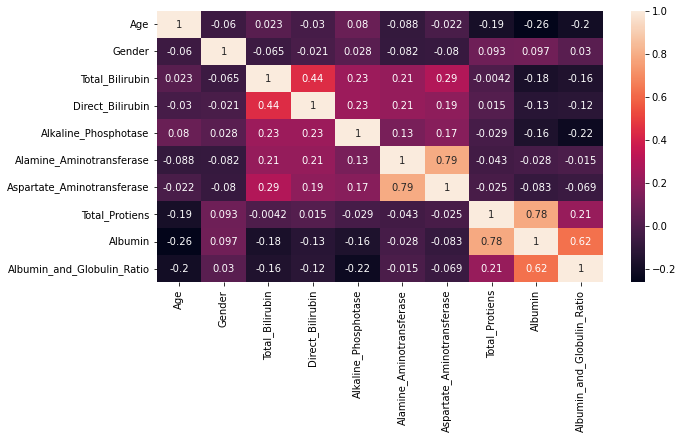

In [78]:
import seaborn as sns

plt.figure(figsize = (10,5))
sns.heatmap(features.corr(), annot= True)
plt.show()

Observation:

- there is a high correlation between Alamine_Aminotransferase and Aspartate_Aminotransferase (0.79).
- there is a high correlation between Total_Proteins and Albumin (0.78).
- there is a high correlation between Albumin and Albumin_and_Globulin_Ratio (0.62).

Only one of the two features from the above pairs will be used.

In [79]:
features = features.drop(['Aspartate_Aminotransferase', 'Albumin'], axis = 1) #removing excess features

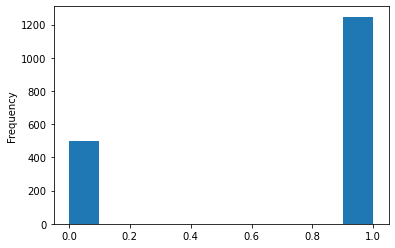

In [80]:
target.plot(kind = 'hist')
plt.show()

## Feature Transformation

In [81]:
# log transformation to remove skewness from features

features['Total_Bilirubin'] = np.log(features['Total_Bilirubin'])
features['Direct_Bilirubin'] = np.log(features['Direct_Bilirubin'])
features['Alkaline_Phosphotase'] = np.log(features['Alkaline_Phosphotase'])
features['Alamine_Aminotransferase'] = np.log(features['Alamine_Aminotransferase'])

## Feature Scaling

In [82]:
# scaling the features using Standard Scaler
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
features_scaled = scale.fit_transform(features)

## Data Rebalancing - Oversampling

The data needs to be rebalanced by oversampling which helps to improve the bias to the minority class. The SMOTE() function is used to carry out this oversampling. Once oversampling is carried out, the shape of the data is checked once more.

In [83]:
from imblearn.over_sampling import SMOTE #to perform oversampling using SMOTE to remove class imbalance

smote = SMOTE(random_state = 42)
features_resampled, target_resampled = smote.fit_resample(features_scaled, target)

print(features_resampled.shape)
print(target_resampled.shape)

(2494, 8)
(2494,)


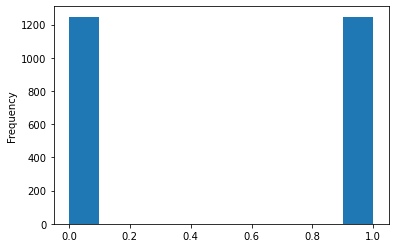

In [84]:
target_resampled.plot(kind = 'hist')
plt.show()

### Train test split (80:20)

In [85]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(features_resampled, target_resampled, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(1995, 8)
(499, 8)
(1995,)
(499,)


## Model training and evaluation

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier(random_state = 42).fit(x_train, y_train)
y_pred_rf = rf.predict(x_val)
y_proba_rf = rf.predict_proba(x_val)

acc_rf = round(accuracy_score(y_val, y_pred_rf) * 100, 2)
cm_rf = confusion_matrix(y_val, y_pred_rf)

print('Random Forest Classifier ')
print('Accuracy:', acc_rf)
print('Confusion metrics:\n', cm_rf)

Random Forest Classifier 
Accuracy: 99.4
Confusion metrics:
 [[264   0]
 [  3 232]]


In [87]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

gbc = GradientBoostingClassifier(random_state = 42).fit(x_train, y_train)
y_pred_gbc = gbc.predict(x_val)
y_proba_gbc = gbc.predict_proba(x_val)

acc_gbc = round(accuracy_score(y_val, y_pred_gbc) * 100, 2)
cm_gbc = confusion_matrix(y_val, y_pred_gbc)

print('Gradient Boosting Classifier ')
print('Accuracy:', acc_gbc)
print('Confusion metrics:\n', cm_gbc)

Gradient Boosting Classifier 
Accuracy: 86.37
Confusion metrics:
 [[245  19]
 [ 49 186]]


In [88]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

abc = AdaBoostClassifier(random_state = 42).fit(x_train, y_train)
y_pred_abc = abc.predict(x_val)
y_proba_abc = abc.predict_proba(x_val)

acc_abc = round(accuracy_score(y_val, y_pred_abc) * 100, 2)
cm_abc = confusion_matrix(y_val, y_pred_abc)

print('AdaBoost Classifier')
print('Accuracy:', acc_abc)
print('Confusion metrics:\n', cm_abc)

AdaBoost Classifier
Accuracy: 77.56
Confusion metrics:
 [[219  45]
 [ 67 168]]


## The Ensemble System

In [89]:
ensemble_proba1 = (y_proba_rf + y_proba_gbc + y_proba_abc)/3
ensemble_pred1 = np.argmax(ensemble_proba1, axis = 1)

acc = accuracy_score(y_val, ensemble_pred1)
cm = confusion_matrix(y_val, ensemble_pred1)

print('Ensemble System')
print('Accuracy:', round(acc*100, 2))
print('Confusion metrics:\n', cm)

Ensemble System
Accuracy: 99.4
Confusion metrics:
 [[264   0]
 [  3 232]]


In this first approach, the problem is tackled from a pure data science perspective, focusing on data pre-processing before training the models.

The following were performed:
 - Imputation : To replace missing values in the dataset. The missing values in continuous numerical features were imputed with the mean and the missing values in the categorical variables were imputed with the mode (most frequent value)
 - Encoding: To apply encoding to the categorical features.
 - Feature Transformation : To remove skewness from the numerical features by logging transformation
 - Feature Selection : To reduce dimensionality by removing one of the two highly correlated features from the dataset.
 - Feature Scaling : To scale the numerical data to avoid bias in the model.
 - Oversampling : To perform oversampling using SMOTE to remove class imbalance from the dataset in order to avoid bias in predictions of classification models.
 
After pre-processing, the data was split into train and test set in the ratio 80:20 and three ensemble models were trained:
- Random Forest
- Gradient Boost
- Ada Boost

Their performance were measured separately and their results were integrated into an ensemble system.

The accuracy of this ensemble system was 99.4 %.

# Approach 2 - Categorising Features

In [90]:
data4_new = data4.copy() #to duplicate the preprocessed dataset for the 2nd approach
data4_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1745 entries, 0 to 1749
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Patient ID                  1745 non-null   int64  
 1   Age                         1745 non-null   float64
 2   Gender                      1745 non-null   int64  
 3   Total_Bilirubin             1745 non-null   float64
 4   Direct_Bilirubin            1745 non-null   float64
 5   Alkaline_Phosphotase        1745 non-null   float64
 6   Alamine_Aminotransferase    1745 non-null   float64
 7   Aspartate_Aminotransferase  1745 non-null   float64
 8   Total_Protiens              1745 non-null   float64
 9   Albumin                     1745 non-null   float64
 10  Albumin_and_Globulin_Ratio  1745 non-null   float64
 11  Disease                     1745 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 177.2 KB


### Categorising Features

In [91]:
def age_category(age): #to create age categories
    
    if age <= 12:
        return 'child'
    elif (age >= 13) and (age <= 17):
        return 'adolescent'
    elif (age >= 18) and (age < 65):
        return 'adult'
    else:
        return 'old'
    
data4_new['Age_Category'] = data4_new['Age'].apply(lambda x : age_category(x))

In [92]:
def TB_category(tb): #to create categories for Total Bilirubin levels
    
    if tb >= 0.2 and tb <= 1.3:
        return 'Healthy'
    elif tb >= 2.5:
        return 'High'
    else: 
        return 'Elevated'

data4_new['TB_category'] = data4_new['Total_Bilirubin'].apply(lambda x : TB_category(x))

In [93]:
def AST_category(age_cat, ast): #to create categories for Aspartate_Aminotransferase levels with regards to age
    
    if age_cat == 'child':
        
        if ast <= 10 and ast <= 40:
            return 'normal'
        else:
            return 'high'
        
    else:
        
        if ast <= 36:
            return 'normal'
        else:
            return 'high'
        
data4_new['AST_category'] = data4_new[['Age_Category','Aspartate_Aminotransferase']].apply(lambda x : AST_category(x.Age_Category, x.Aspartate_Aminotransferase), axis =1)

In [94]:
def ALT_category(alt): #to create categories Alamine_Aminotransferase levels
         
    if alt >= 7 and alt <= 55:
        return 'normal'
    else:
        return 'abnormal'
        
data4_new['ALT_category'] = data4_new['Alamine_Aminotransferase'].apply(lambda x : ALT_category(x))

In [95]:
def TP_category(tp): #to create categories for total protein levels
         
    if tp <= 7.9:
        return 'normal'
    else:
        return 'abnormal'
        
data4_new['TP_category'] = data4_new['Total_Protiens'].apply(lambda x : TP_category(x))

In [96]:
def ALB_category(x): #to create categories for albumin
         
    if x >= 3.5 and x <= 5.0:
        return 'normal'
    else:
        return 'abnormal'      
        
data4_new['ALB_category'] = data4_new['Albumin'].apply(lambda x : ALB_category(x))

In [97]:
def ALP_category(x): #to create categories for Alkaline_Phosphotase levels
         
    if x >= 40 and x <= 129:
        return 'normal'
    else:
        return 'abnormal'
                
data4_new['ALP_category'] = data4_new['Alkaline_Phosphotase'].apply(lambda x : ALP_category(x))

In [98]:
def AG_category(x): #to create category for Albumin and Globulin Ratio
         
    if x >= 1.1 and x <= 2.5:
        return 'normal'
    else:
        return 'abnormal'
        
data4_new['AG_category'] = data4_new['Albumin_and_Globulin_Ratio'].apply(lambda x : AG_category(x))

In [99]:
#to remove numerical columns that have been categorized.
data4_new = data4_new.drop(['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Total_Protiens'], axis = 1)

In [100]:
data4_new.head() #to view the dataset with categories

,Patient ID,Gender,Direct_Bilirubin,Disease,Age_Category,TB_category,AST_category,ALT_category,TP_category,ALB_category,ALP_category,AG_category
0,1,1,0.1,1,old,Healthy,normal,normal,normal,abnormal,abnormal,abnormal
1,2,0,5.5,1,adult,High,high,abnormal,normal,abnormal,abnormal,abnormal
2,3,0,4.1,1,adult,High,high,abnormal,normal,abnormal,abnormal,abnormal
3,4,0,0.4,1,adult,Healthy,normal,normal,normal,abnormal,abnormal,abnormal
4,5,0,2.0,1,old,High,high,normal,normal,abnormal,abnormal,abnormal


## Data Transformation and Encoding

In [101]:
# log transforming direct bilirubin
data4_new['Direct_Bilirubin'] = np.log(data4_new['Direct_Bilirubin'])

# label encoding the categorical columns
data4_new['AST_category'] = data4_new['AST_category'].replace(['normal', 'high'], [0, 1])
data4_new['ALT_category'] = data4_new['ALT_category'].replace(['normal', 'abnormal'], [0, 1])
data4_new['TP_category'] = data4_new['TP_category'].replace(['normal', 'abnormal'], [0, 1])
data4_new['ALB_category'] = data4_new['ALB_category'].replace(['normal', 'abnormal'], [0, 1])
data4_new['ALP_category'] = data4_new['ALP_category'].replace(['normal', 'abnormal'], [0, 1])
data4_new['AG_category'] = data4_new['AG_category'].replace(['normal', 'abnormal'], [0, 1])

In [102]:
# one hot encoding 
data4_new = pd.get_dummies(data4_new, drop_first = True)
data4_new.head()

,Patient ID,Gender,Direct_Bilirubin,Disease,AST_category,ALT_category,TP_category,ALB_category,ALP_category,AG_category,Age_Category_adult,Age_Category_child,Age_Category_old,TB_category_Healthy,TB_category_High
0,1,1,-2.302585,1,0,0,0,1,1,1,0,0,1,1,0
1,2,0,1.704748,1,1,1,0,1,1,1,1,0,0,0,1
2,3,0,1.410987,1,1,1,0,1,1,1,1,0,0,0,1
3,4,0,-0.916291,1,0,0,0,1,1,1,1,0,0,1,0
4,5,0,0.693147,1,1,0,0,1,1,1,0,0,1,0,1


In [103]:
features = data4_new.drop(['Patient ID', 'Disease'], axis = 1) #to remove unneeded data
target = data4_new.Disease

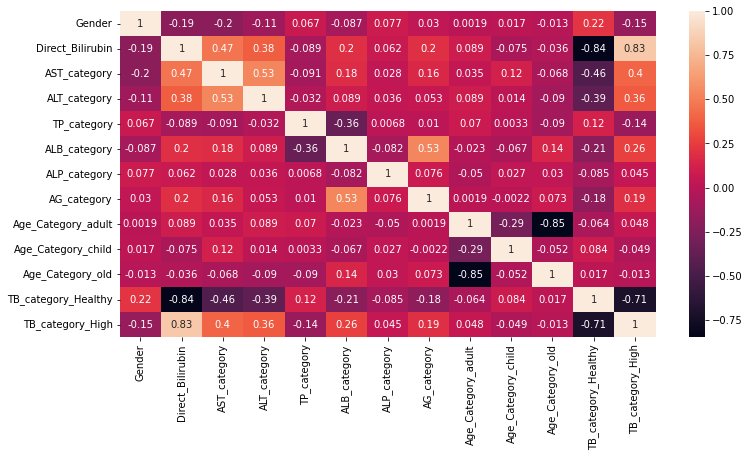

In [104]:
import seaborn as sns

plt.figure(figsize = (12,6))
sns.heatmap(features.corr(), annot = True)
plt.show()

In [105]:
features = features.drop(['Direct_Bilirubin','Age_Category_old', 'TB_category_Healthy'], axis = 1) #removing excess features for dimensionality reduction

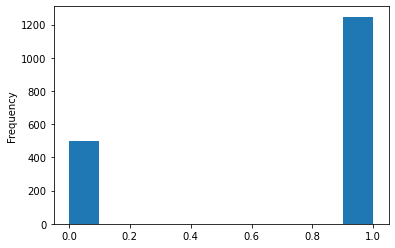

In [106]:
target.plot(kind = 'hist')
plt.show()

### Oversampling

In [107]:
from imblearn.over_sampling import SMOTE #to perform oversampling using SMOTE to remove class imbalance

smote = SMOTE(random_state = 42)
features_resampled, target_resampled = smote.fit_resample(features, target)

print(features_resampled.shape)
print(target_resampled.shape)

(2494, 10)
(2494,)


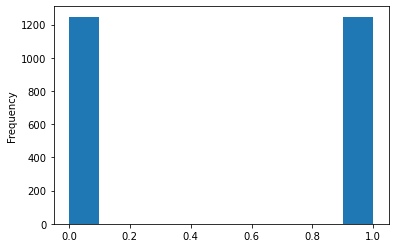

In [108]:
target_resampled.plot(kind = 'hist')
plt.show()

## Train Test Split (80:20)

In [109]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(features_resampled, target_resampled, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(1995, 10)
(499, 10)
(1995,)
(499,)


In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier(random_state = 42).fit(x_train, y_train)
y_pred_rf = rf.predict(x_val)
y_proba_rf = rf.predict_proba(x_val)

acc_rf = round(accuracy_score(y_val, y_pred_rf) * 100, 2)
cm_rf = confusion_matrix(y_val, y_pred_rf)

print('Random Forest Classifier')
print('Accuracy:', acc_rf)
print('Confusion metrics:\n', cm_rf)

Random Forest Classifier
Accuracy: 78.16
Confusion metrics:
 [[229  35]
 [ 74 161]]


In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

gbc = GradientBoostingClassifier(random_state = 42).fit(x_train, y_train)
y_pred_gbc = gbc.predict(x_val)
y_proba_gbc = gbc.predict_proba(x_val)

acc_gbc = round(accuracy_score(y_val, y_pred_gbc) * 100, 2)
cm_gbc = confusion_matrix(y_val, y_pred_gbc)

print('Gradient Boosting Classifier')
print('Accuracy:', acc_gbc)
print('Confusion metrics:\n', cm_gbc)

Gradient Boosting Classifier
Accuracy: 75.55
Confusion metrics:
 [[216  48]
 [ 74 161]]


In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

abc = AdaBoostClassifier(random_state = 42).fit(x_train, y_train)
y_pred_abc = abc.predict(x_val)
y_proba_abc = abc.predict_proba(x_val)

acc_abc = round(accuracy_score(y_val, y_pred_abc) * 100, 2)
cm_abc = confusion_matrix(y_val, y_pred_abc)

print('AdaBoost Classifier')
print('Accuracy:', acc_abc)
print('Confusion metrics:\n', cm_abc)

AdaBoost Classifier
Accuracy: 70.74
Confusion metrics:
 [[211  53]
 [ 93 142]]


## Ensemble System

In [71]:
ensemble_proba2 = (y_proba_rf + y_proba_gbc + y_proba_abc)/3
ensemble_pred2 = np.argmax(ensemble_proba2, axis = 1)

acc = accuracy_score(y_val, ensemble_pred2)
cm = confusion_matrix(y_val, ensemble_pred2)
print('Accuracy : ', round(acc*100, 2))
print('Confusion metrics :\n', cm)

Accuracy :  77.56
Confusion metrics :
 [[227  37]
 [ 75 160]]


# Model performance after applying PCA instead of using correlation

### PCA on features

To remove dimensionality of the features

In [73]:
from sklearn.decomposition import PCA

In [74]:
features = data4_new.drop(['Patient ID', 'Disease'], axis = 1) #removing unneeded features for dimensionality reduction
target = data4_new.Disease

In [75]:
feature_pca = PCA(n_components = 0.95).fit_transform(features)

### Oversampling

In [76]:
from imblearn.over_sampling import SMOTE #to perform oversampling using SMOTE to remove class imbalance

smote = SMOTE(random_state = 42)
features_resampled, target_resampled = smote.fit_resample(feature_pca, target)

print(features_resampled.shape)
print(target_resampled.shape)

(2494, 8)
(2494,)


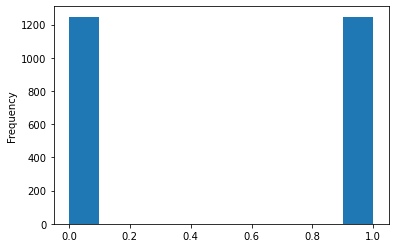

In [77]:
target_resampled.plot(kind = 'hist')
plt.show()

## Train Test split (80:20)

In [78]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(features_resampled, target_resampled, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(1995, 8)
(499, 8)
(1995,)
(499,)


In [85]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [81]:
rf = RandomForestClassifier(random_state = 42).fit(x_train, y_train)
y_pred_rf = rf.predict(x_val)
y_proba_rf = rf.predict_proba(x_val)

acc_rf = round(accuracy_score(y_val, y_pred_rf) * 100, 2)
cm_rf = confusion_matrix(y_val, y_pred_rf)

print('Random Forest Classifier:')
print('Accuracy:', acc_rf)
print('Confusion metrics:\n', cm_rf)

Random Forest Classifier:
Accuracy: 83.17
Confusion metrics:
 [[245  19]
 [ 65 170]]


In [82]:
bc = GradientBoostingClassifier(random_state = 42).fit(x_train, y_train)
y_pred_gbc = gbc.predict(x_val)
y_proba_gbc = gbc.predict_proba(x_val)

acc_gbc = round(accuracy_score(y_val, y_pred_gbc) * 100, 2)
cm_gbc = confusion_matrix(y_val, y_pred_gbc)

print('Gradient Boosting Classifier:')
print('Accuracy:', acc_gbc)
print('Confusion metrics:\n', cm_gbc)

Gradient Boosting Classifier:
Accuracy: 82.16
Confusion metrics:
 [[252  12]
 [ 77 158]]


In [84]:
abc = AdaBoostClassifier(random_state = 42).fit(x_train, y_train)
y_pred_abc = abc.predict(x_val)
y_proba_abc = abc.predict_proba(x_val)

acc_abc = round(accuracy_score(y_val, y_pred_abc) * 100, 2)
cm_abc = confusion_matrix(y_val, y_pred_abc)

print('AdaBoost Classifier:')
print('Accuracy:', acc_abc)
print('Confusion metrics:\n', cm_abc)

AdaBoost Classifier:
Accuracy: 76.55
Confusion metrics:
 [[227  37]
 [ 80 155]]


## Ensemble System

In [86]:
ensemble_proba2 = (y_proba_rf + y_proba_gbc + y_proba_abc)/3
ensemble_pred2 = np.argmax(ensemble_proba2, axis = 1)

acc = accuracy_score(y_val, ensemble_pred2)
cm = confusion_matrix(y_val, ensemble_pred2)
print('Accuracy : ', round(acc*100, 2))
print('Confusion metrics :\n', cm)

Accuracy :  83.57
Confusion metrics :
 [[250  14]
 [ 68 167]]


## Second Approach

In this second approach, the continuous variables are categorised based on information provided in the provided articles.

The missing values were removed in the same way as in the first approach

The following were categorised: 
- Age into four categories: child, adolescent, adult and old.
- Total_Bilirubin into three categories : healthy, elevated and high (article 1 and 2).
- Alkaline_Phosphotase into two categories : normal and abnormal (article 4).
- Alamine_Aminotransferase into two categories : normal and abnormal (article 4).
- Albumin into two categories: normal and abnormal (article 4).
- Albumin_and_Globulin_Ratio into two categories: normal and abnormal (the categories for Albumin_and_Globulin_Ratio were referenced from https://labs.selfdecode.com/blog/albumin-globulin-ratio/#:~:text=In%20general%2C%20an%20albumin%2Fglobulin,higher%20than%201%20%5B1%5D.).
- Aspartate_Aminotransferase into two categories: normal and high (article 3) corresponding to values specified for children and adults.
- Total_Protiens into two categories: normal and abnormal (article 4).
- Alamine_Aminotransferase into two categories (article 4).

Two methods were used to reduce the dimensionality of the data and the data was oversampled by using smote after which model training and evaluation of the ensemble system was performed: 

1. Dimensionality reduction using correlation: the achieved accuracy was 77.56%
2. Dimensionality reduction using PCA explaining 95% variance: the achieved accuracy was 83.57%


## Approach Comparison

The first approach yielded better results in terms of accuracy and confusion matrix over the second approach.

This may be because the second approach may have introduced additional noise or complexity into the dataset, making it harder for the classifiers to identify the most important features for predicting liver disease.